# Computer vision 

You can see the [slide](https://docs.google.com/presentation/d/1fojNa3hhxuBXMwBxDgRm_s-d0sCxaYODlymg1CfuJ0A/edit#slide=id.g2a1d644d2c4_0_1001) for addition infomation

# Load image

In [1]:
pip install opencv-python

You should consider upgrading via the '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image = cv.imread("data/mona_lisa.jpeg") # image in BGR format
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # convert to RGB

In [4]:
# image
image.shape

(255, 197, 3)

In [5]:
image

array([[[120, 135, 156],
        [120, 135, 156],
        [121, 136, 157],
        ...,
        [127, 152, 172],
        [130, 155, 175],
        [135, 157, 178]],

       [[116, 131, 152],
        [115, 130, 151],
        [115, 130, 151],
        ...,
        [138, 163, 183],
        [140, 165, 185],
        [145, 167, 188]],

       [[118, 133, 152],
        [115, 130, 149],
        [112, 127, 146],
        ...,
        [136, 161, 181],
        [138, 163, 183],
        [143, 166, 184]],

       ...,

       [[  9,   5,   4],
        [ 12,   8,   7],
        [ 16,  12,  11],
        ...,
        [ 44,  33,  29],
        [ 38,  27,  23],
        [ 62,  51,  47]],

       [[  8,   4,   3],
        [ 14,  10,   9],
        [ 20,  16,  15],
        ...,
        [ 48,  37,  33],
        [ 45,  34,  30],
        [ 74,  63,  59]],

       [[  8,   4,   3],
        [ 16,  12,  11],
        [ 24,  20,  19],
        ...,
        [ 38,  29,  24],
        [ 35,  26,  21],
        [ 64,  55,  50]]

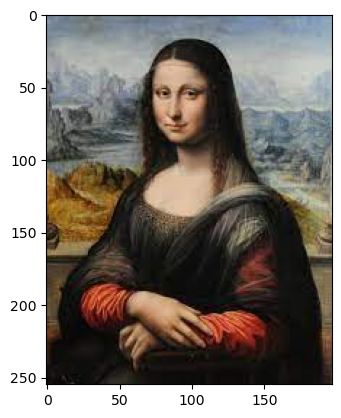

In [5]:
plt.figure()
plt.imshow(image)
plt.show()

# Grey scale image

Fill the following function to create a grey scale image, where each pixel value is calculated with the following formula.

$  Grey = 0.299 ∙ R + 0.587 ∙ G + 0.114 ∙ B $

make sure the output of the function is M,N image.

In [16]:
def conver_to_grey_scale(image):
    # fill your code
    r = image[:, :, 0 ]
    g = image[:, :, 1 ]
    b = image[:, :, 2 ]
    grey_image = 0.299 *r + 0.587* g + 0.114* b
    return grey_image

In [8]:
h_ind = 10
w_ind = 20
r,g,b = image[h_ind, w_ind]

In [10]:
grey = 0.299 *r + 0.587* g + 0.114* b
grey

127.025

In [14]:
image_grey = conver_to_grey_scale(image)

In [10]:
r = image[:, :, 0 ]
g = image[:, :, 1 ]
b = image[:, :, 2 ]
grey_image = 0.299 *r + 0.587* g + 0.114* b
grey_image.shape

(255, 197)

In [15]:
image.shape

(255, 197, 3)

In [17]:
image_grey = conver_to_grey_scale(image)

In [18]:
image_grey.shape

(255, 197)

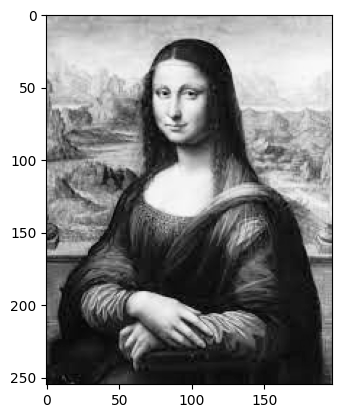

In [20]:
plt.figure()
plt.imshow(image_grey, cmap="Greys_r")
plt.show()
plt.close()

# 1 . Pad Image

The following block of code create a padded image cording to the REFLECT method.

In [22]:
padded_image = cv.copyMakeBorder(src = image_grey,
                                 top=1,
                                 bottom=1,
                                 left=1,
                                 right=1,
                                 borderType = cv.BORDER_REFLECT)

In [28]:
padded_image.shape

(257, 199)

In [29]:
grey_image.shape

(255, 197)

# 2. Create convolution

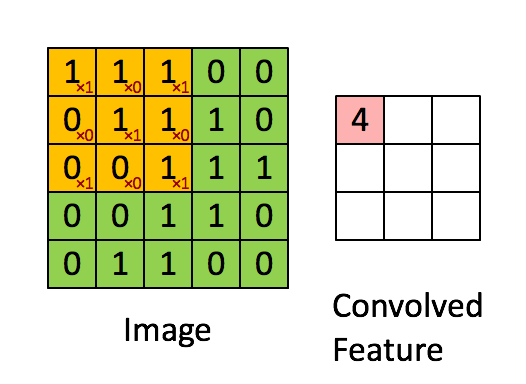

Fill the function bellow to implement the convolution of an image with a kernel.  
Do that for the simple case with stride equals 1, so the kernel move one pixel at each time.

In [61]:
def apply_kernel(image, kernel):
    h, w = image.shape
    k_shape_h, k_shape_w = kernel.shape
    
    h_new = (h - k_shape_h ) + 1
    w_new = (w - k_shape_w ) + 1
    
    new_image = np.zeros( (h_new, w_new) )
    # fill your code
    for y_ind in range(h_new):
        for x_ind in range(w_new):
            patch = image[y_ind: y_ind + 3, x_ind: x_ind + 3]
            new_image[y_ind, x_ind] = np.sum(patch * kernel)
            
    return new_image

In [62]:
kernel = two_d_kernel

In [63]:

patch = grey_image[10:13, 20:23]
np.sum(patch * kernel)

128.31789508372358

the following blocks of code applying the gaussian kernel to the padded image

In [64]:
one_d_kernel = cv.getGaussianKernel(ksize = 3, sigma =  2) 
two_d_kernel = one_d_kernel * one_d_kernel.T
two_d_kernel

array([[0.10186806, 0.11543164, 0.10186806],
       [0.11543164, 0.13080118, 0.11543164],
       [0.10186806, 0.11543164, 0.10186806]])

In [65]:
blur_result = apply_kernel(padded_image, two_d_kernel)

In [66]:
blur_result.shape

(255, 197)

In [67]:
padded_image.shape

(257, 199)

In [68]:
image_grey.shape

(255, 197)

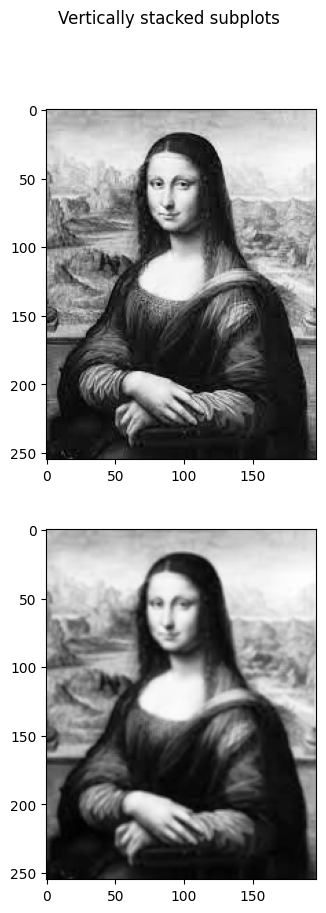

In [69]:
fig, axs = plt.subplots(figsize = (10,10), nrows=2)
fig.suptitle('Vertically stacked subplots')
axs[0].imshow(image_grey, "Greys_r")
axs[1].imshow(blur_result, "Greys_r")

# Sobel filter

Bellow we apply the sobel filter that calculate the gradient of the image.
Sobel filter can be used for edge detection.

Run the code to see the results

In [ ]:
kernel_sobel_x = [
            [-1, 0 , 1 ],
            [-2, 0 , 2 ],
            [-1, 0 , 1 ],
           ]
kernel_sobel_x = np.array(kernel_sobel_x)

grad_grey_x = apply_kernel(padded_image, kernel_sobel_x)

In [ ]:
kernel_sobel_y = [
                    [-1,  -2, -1],
                    [ 0,  0,   0],
                    [ 1,  2,   1],
                ]
kernel_sobel_y = np.array(kernel_sobel_y)

grad_grey_y = apply_kernel(padded_image, kernel_sobel_y)

total_grad = np.sqrt( np.square(grad_grey_x) +  np.square(grad_grey_y) )

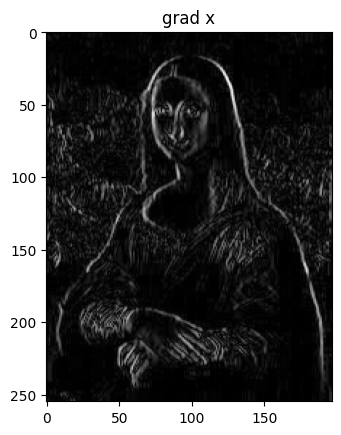

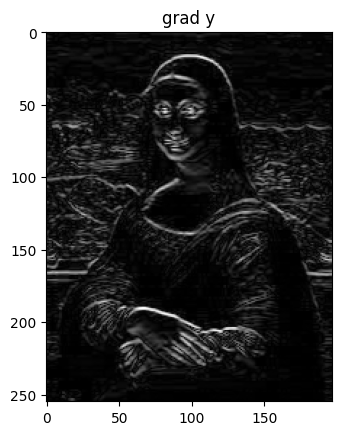

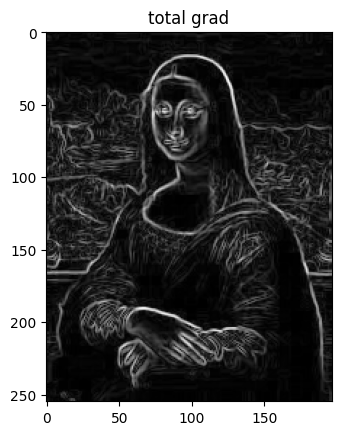

In [ ]:
plt.figure()
plt.imshow(np.abs(grad_grey_x), "Greys_r")
plt.title("grad x")
plt.show()
plt.close()

plt.figure()
plt.imshow(np.abs(grad_grey_y), "Greys_r")
plt.title("grad y")
plt.show()
plt.close()

plt.figure()
plt.imshow(total_grad, "Greys_r")
plt.title("total grad")
plt.show()
plt.close()